In [1]:
# importar os pacotes necessários
import pandas as pd 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
import pdb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataframe 

* Carregando o dataframe de treino http://archive.ics.uci.edu/ml/datasets/Census+Income. Posteriormente iremos carregar o dataset de teste

    1. age: continuous.
    2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    3. fnlwgt: continuous.
    4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    5. education-num: continuous.
    6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, **    Protective-serv, Armed-Forces.
    8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    10. sex: Female, Male.
    11. capital-gain: continuous.
    12. capital-loss: continuous.
    13. hours-per-week: continuous.
    14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland,   Jamaica,  Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&   Tobago, Peru,  Hong, Holand-Netherlands.
    15. class: >50K, <=50K.


In [2]:
##Carregando os datasets de treino na fonte de dados 
treino_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_treino=pd.read_csv(treino_url, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'], header=None, index_col=False)
pd.set_option('display.max_columns', 500)
display(df_treino)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Imprimindo as 5 primeiras linhas
df_treino.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Imprimindo as 5 últimas linhas
df_treino.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
#Imprimindo a quantidade de dados e variáveis
print("Quantidade de dados: ", df_treino.shape[0])
print("Quantidade de variáveis: ", df_treino.shape[1])

Quantidade de dados:  32561
Quantidade de variáveis:  15


# Análise exploratória

Antes de aplicarmos os modelos de machine learning, vamos realizar uma analise exploratoria dos dados para avaliar a necessidade de alguma alteração.
primeiramente, verificaremos quantos dados e variaveis possuem no dataset de treino

>* Tamanho do dataset: 32561 dados de entrada
>* Total de colunas: 15 colunas
>* Total de variaveis: 15 variaveis
>* Variavel target: A variavel target(class) , define se uma pessoa faz abaixo de $50K por ano ou se excede  esse valor baseado nos dados 

* Cada dado de entrada representa uma pessoa consultada
>__Tipo das variveis__
* Variavel Numerica(6 variaveis, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
* Variavel Categorica(9 , object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, class

>__Valores Nulos__
* Não possuimos valores nulos em nenhuma das colunas

Criaremos uma função para auxiliar a compreensão de forma mais especifica cada variavel que compõe o dataset de treino

In [6]:
def Map_Var_DF (features, df):
  #Criando um dicionário para receber as variáveis
  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append(round(df[feature].isnull().sum() / df.shape[0],4))

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Atribuindo o valor 0 se a variável não for binária
      dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var

Vamos criar um dataframe com as características das features

In [7]:
#Armazenando as features
features = df_treino.columns.to_list()

#Armazenando as informações das variáveis
df_var = Map_Var_DF(features = features, df = df_treino)

#Imprimindo o dataframe
df_var

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,age,int64,0,0,73,17,90,0.0
1,workclass,object,1,0,9,N/A,N/A,0.0
2,fnlwgt,int64,0,0,21648,12285,1484705,0.0
3,education,object,1,0,16,N/A,N/A,0.0
4,education-num,int64,0,0,16,1,16,0.0
5,marital-status,object,1,0,7,N/A,N/A,0.0
6,occupation,object,1,0,15,N/A,N/A,0.0
7,relationship,object,1,0,6,N/A,N/A,0.0
8,race,object,1,0,5,N/A,N/A,0.0
9,sex,object,1,1,2,N/A,N/A,0.0


A partir do dataframe das features é possivel concluir que:
Type of features:

* Numerical features (6 features, int64): age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

* Categorical features (9 features, object(str)): workclass, education, marital-status, occupation, relationship, race, sex, native-country, class
* Ausência de valores nulos 


In [8]:
def descricao_dataset(df):
  ##descrição do dataset
  print('Quantidade de dados:  %s\n' % (df.shape, ))
  print('Quantidade de variáveis: %s\n' % df.columns)
  
  print('Dataframe primeira ate a ultima linha:\n' % df.columns)
  display(df)
  
  print('\nDescrição das Colunas:\n')
  display(df.info())
  display(df.describe())
  
  print('\nValores Nulos:\n')
  display(df.isnull().sum())

In [9]:
descricao_dataset(df_treino)

Quantidade de dados:  (32561, 15)

Quantidade de variáveis: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

Dataframe primeira ate a ultima linha:



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K



Descrição das Colunas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000



Valores Nulos:



age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

# Analise das Variaveis 
 Realizaremos uma analise no dataset de treino para avaliar o comportamento dos dados 

In [10]:
# Função criada para auxiliar no processo de analise das variaveis categoricas. Obtendo os valores totais, porcentagem e valores nulos.

def analise_variavel_categorica(df, nome_variavel):
  ##nome_variavel é o nome da variavel analisada
  print('valores dos dados pela classe de variavel  %s:\n%s\n' % (nome_variavel, df[nome_variavel].value_counts(dropna=False))) #Valores totais da variavel por categoria
  print('Percentagem dos dados pela classe de variavel %s:\n%s\n' % (nome_variavel, df[nome_variavel].value_counts(normalize=True, dropna=False))) #porcentagem da variavel por categoria 
  print('Valores unicos da variavel %s:\n%s\n'  % (nome_variavel, df[nome_variavel].unique())) #valores unicos da variavel

# Função criada para auxiliar no processo de analise das variaveis continuas. Obtendo os valores totais, porcentagem e valores nulos.
def analise_variavel_continua(df, nome_variavel):
  ##nome_variavel é o nome da variavel analisada
  print('Distribuição de dados da variavel  %s:\n%s\n' % (nome_variavel, df[nome_variavel].value_counts(dropna=False))) #distribuição dos valores da variavel
  print('Porcentagem da distribuição dos dados da variavel  %s:\n%s\n' % (nome_variavel, df[nome_variavel].value_counts(normalize=True, dropna=False))) #porcentagem de distribuição dos valores da variavel
  print('Total de valores unicos da variavel %s: %i\n'  % (nome_variavel, len(df[nome_variavel].unique()))) # valores unicos da variavel 
  display(df[nome_variavel].describe())

### Variável target (class)

>É definida se a pessoa ganham  que $50K por ano (class >50K) ou não (class <50K)

* Variável target categorica com 2 classes
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 76% (24720) das pessoas ganham menos ou igual a $50K por ano , e 34%(7841) das pessoas ganham $50K por ano.
* Realizaremos um tratamento para tratar o desbalanceamento da classe.


valores dos dados pela classe de variavel  class:
 <=50K    24720
 >50K      7841
Name: class, dtype: int64

Percentagem dos dados pela classe de variavel class:
 <=50K    0.75919
 >50K     0.24081
Name: class, dtype: float64

Valores unicos da variavel class:
[' <=50K' ' >50K']



[Text(0, 0, ' <=50K'), Text(1, 0, ' >50K')]

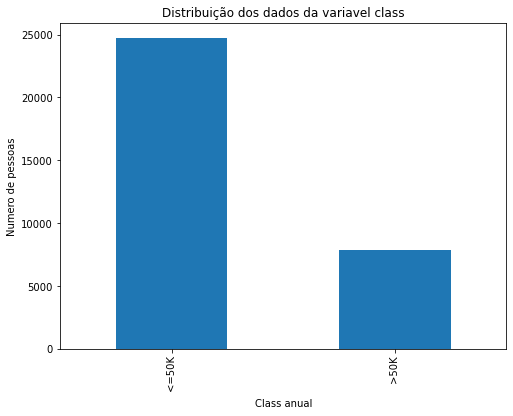

In [11]:
variavel='class'
analise_variavel_categorica(df_treino, variavel)

##plot de distribuição
ax=df_treino[variavel].value_counts().plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Class anual')
ax.set_xticklabels(labels=[' <=50K', ' >50K'])

### Variável age

>Distribuição dos valores de dados

__count__: 32561\
__null__: 0\
__mean__: 38.58 anos\
__std:__ 13.64 anos\
__min:__ 17 anos\
__25%:__ 28 anos\
__50%:__ 37 anos\
__75%:__ 48 anos\
__max:__ 90 anos



* Variável numerica com os valores de idade entre 17 ate 90 anos 
* Sem valores ausentes ou nulos 
* Grande concentração de pessoas com a idade entre 20 e 48 anos 
* Valores da idade apresentam media de 38.58 anos e mediana de 37 anos
* 25% das pessoas esta com 28 anos de idade e 75 % das pessoas possuem menos de 48 anos de idade
* Em relação a ao relacionamento entre a variação ano e class, nos notamos que pessoas mais velhas tendem a ganhar mais que $50K por ano, enquanto pessoas mais novas tendem a ganhar menos que $50K por ano 
* Entretanto, observando o boxplot percebemos uma area de intersecção entre as pessoas mais novas com as velhas , e vice e versa. relatando a relevancia de outras variaveis para determinar a class.


valores dos dados pela classe de variavel  age:
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

Percentagem dos dados pela classe de variavel age:
36    0.027579
31    0.027272
34    0.027210
23    0.026934
35    0.026903
        ...   
83    0.000184
88    0.000092
85    0.000092
86    0.000031
87    0.000031
Name: age, Length: 73, dtype: float64

Valores unicos da variavel age:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]



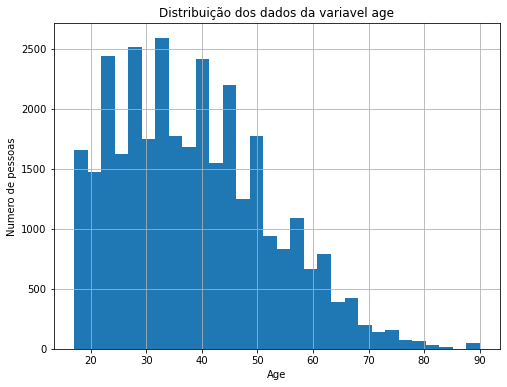

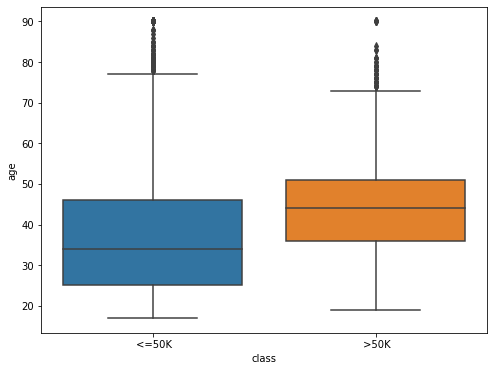

In [12]:
variavel='age'
analise_variavel_categorica(df_treino, variavel)


ax=df_treino[variavel].hist(bins=30)
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Age')
plt.show()

sns.boxplot(y='age' , x='class' , data=df_treino)
plt.show()

### Variavel fnlwgt

> Essa variavel representa um peso estimativo para cada pesso conforme o Census. O peso demonstra que as duas amostras são similares, eles tambem apresentam caractetisticas similates


* Variavel numerica com larga escalas de valores, aparentemente sendo um valor distinto para cada pessoa
* Sem valores ausentes ou nulos 
* Em relação ao relacionamento entre a variavel fnlwgt e a class, noa observamos que ambas as classes da variavel classe apresentam distribuição com pouca diferença notavel
* É possivel notar a presença de outlier em ambas as classes


valores dos dados pela classe de variavel  fnlwgt:
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

Percentagem dos dados pela classe de variavel fnlwgt:
164190    0.000399
203488    0.000399
123011    0.000399
148995    0.000369
121124    0.000369
            ...   
232784    0.000031
325573    0.000031
140176    0.000031
318264    0.000031
257302    0.000031
Name: fnlwgt, Length: 21648, dtype: float64

Valores unicos da variavel fnlwgt:
[ 77516  83311 215646 ...  34066  84661 257302]



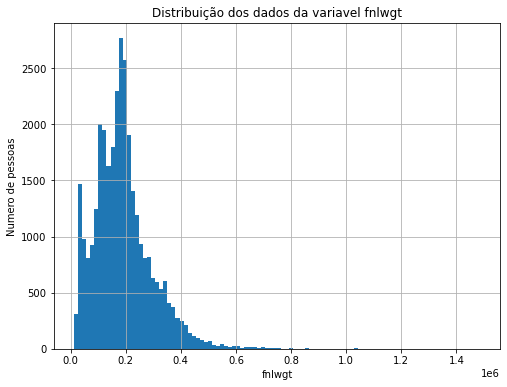

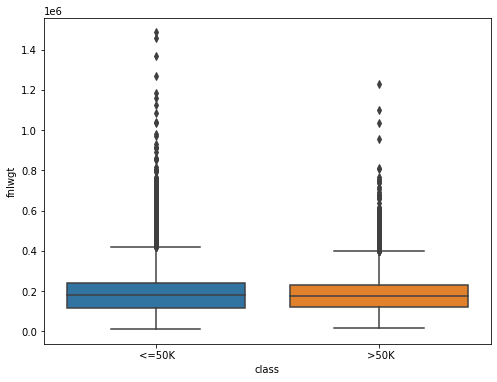

In [13]:
variavel='fnlwgt'
analise_variavel_categorica(df_treino, variavel)


ax=df_treino[variavel].hist(bins=100)
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('fnlwgt')
plt.show()

sns.boxplot(y='fnlwgt' , x='class' , data=df_treino)
plt.show()

### Variavel education


* Variavel categorica com 16 categorias distintas de educação
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 32.3% (10501) das pessoas possuem hig school graduation(HS-grad), seguido por 22.4%(7291) das pessoas que possuem college degree, e 16.4% das pessoas possuem bachelor's degree
* Notamos que algumas classes apresentam os mesmos significados de education degree. HS-grad e 9th são relatadas como high school graduation. Seguindo esse raciocinio algumas classes poderão ser agrupadas
* Dos 5,14% das pessoas que possuem HS-grad 32,3% ganham mais que $50K por ano
* Dos 6,82% das pessoas que possuem bachelors degree 22,4% ganham mais que $50K por ano
* Dos 0,94% das pessoas que possuem doctorate degree 1,27% ganham mais que $50K por ano
* É possivel observar que pessoas que possuem um nivel de escolaridade mais elevada( masters e doctorate) tendem a ganhar mais que 50K por ano quando comparada com outras classes

Distribuição de dados da variavel  education:
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

Porcentagem da distribuição dos dados da variavel  education:
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64

Total de valores unicos da variavel educatio

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

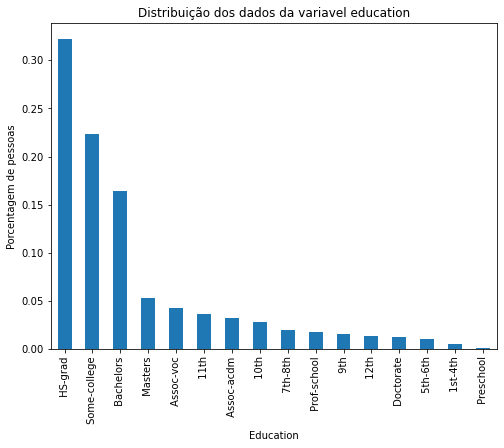

Porcentagem de pessoas com  HS-grad that makes >$50K/yr:  5.144190903227788
Porcentagem de pessoas com college degree que fazem >$50K/yr:  4.259697183747428
Porcentagem de pessoas com bachelors que fazem  >$50K/yr:  6.821043579742637
Porcentagem de pessoas com doctorate degree que fazem  >$50K/yr:  0.9397745769478825


class,<=50K,>50K
education,,
10th,0.933548,0.066452
11th,0.948936,0.051064
12th,0.923788,0.076212
1st-4th,0.964286,0.035714
5th-6th,0.951952,0.048048
7th-8th,0.938080,0.061920
9th,0.947471,0.052529
Assoc-acdm,0.751640,0.248360
Assoc-voc,0.738784,0.261216


Text(0, 0.5, 'Porcentagem de pessoas  (Normalizado pela class)')

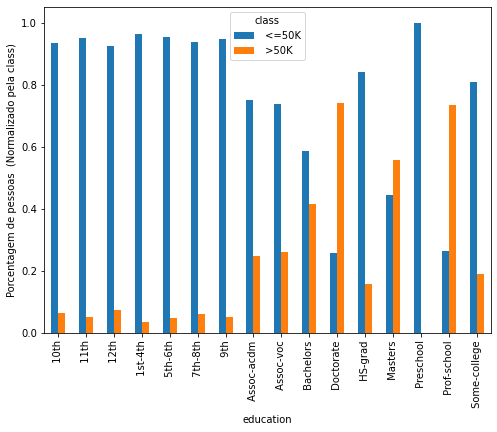

In [14]:
variavel='education'
analise_variavel_continua(df_treino, variavel)

##Plot da distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('Education')
ax.set_xticklabels(labels=[' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc', ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th', ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'])
plt.show()

print('Porcentagem de pessoas com  HS-grad that makes >$50K/yr: ', len(df_treino[(df_treino['education']==' HS-grad') & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com college degree que fazem >$50K/yr: ', len(df_treino[(df_treino['education']==' Some-college') & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com bachelors que fazem  >$50K/yr: ', len(df_treino[(df_treino['education']==' Bachelors') & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas com doctorate degree que fazem  >$50K/yr: ', len(df_treino[(df_treino['education']==' Doctorate') & (df_treino['class']==' >50K')])/len(df_treino)*100)

display(pd.crosstab([df_treino['education']], df_treino['class'], normalize='index'))

pd.crosstab([df_treino['education']], df_treino['class'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (Normalizado pela class)')

### Variavel relationship


* Variavel categorica com 6 classes  distintas de relationship
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 40.5% (13193) das pessoas são maridos , enquanto 4.8%(1568) são esposas
* Contudo , notamos que independendo de ser marido ou esposa ambos são capazes de obter ganhar mais que 50K quando comparado com outras categorias


Distribuição de dados da variavel  relationship:
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

Porcentagem da distribuição dos dados da variavel  relationship:
 Husband           0.405178
 Not-in-family     0.255060
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
 Other-relative    0.030128
Name: relationship, dtype: float64

Total de valores unicos da variavel relationship: 6



count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

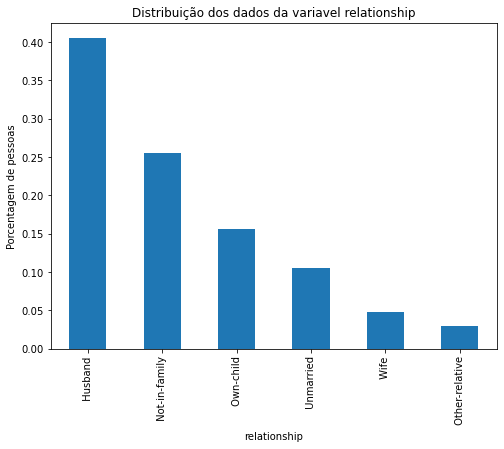

class,<=50K,>50K
relationship,,
Husband,0.551429,0.448571
Not-in-family,0.896930,0.103070
Other-relative,0.962283,0.037717
Own-child,0.986780,0.013220
Unmarried,0.936738,0.063262
Wife,0.524872,0.475128


Text(0, 0.5, 'Porcentagem de pessoas  (Normalizado pela class)')

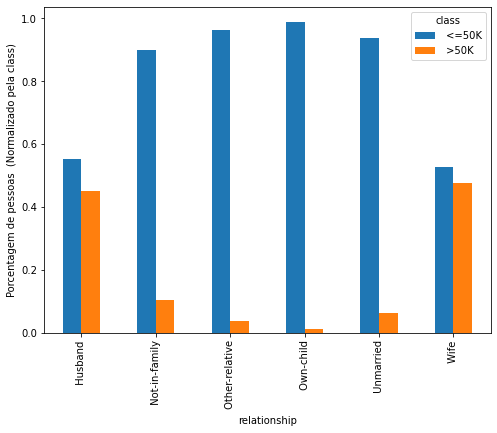

In [15]:
variavel='relationship'
analise_variavel_continua(df_treino, variavel)

##Plot da distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('relationship')
ax.set_xticklabels(labels=[' Husband', ' Not-in-family', ' Own-child', ' Unmarried', ' Wife', ' Other-relative'])
plt.show()

display(pd.crosstab([df_treino['relationship']], df_treino['class'], normalize='index'))

pd.crosstab([df_treino['relationship']], df_treino['class'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (Normalizado pela class)')

### Variavel race


* Variavel categorica com 5 categorias de raça  
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 85,4% (27816) das pessoas são brancos , enquanto 9.6%(3124)  das pessoas são negras.

valores dos dados pela classe de variavel  race:
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

Percentagem dos dados pela classe de variavel race:
 White                 0.854274
 Black                 0.095943
 Asian-Pac-Islander    0.031909
 Amer-Indian-Eskimo    0.009551
 Other                 0.008323
Name: race, dtype: float64

Valores unicos da variavel race:
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']



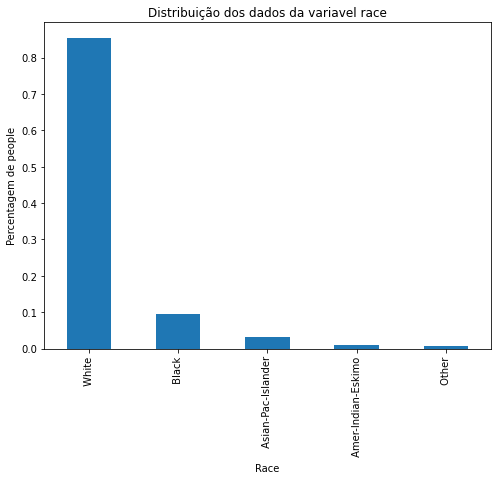

class,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744140,0.255860


Text(0, 0.5, 'Porcentagem de pessoas  (normalizado pela class)')

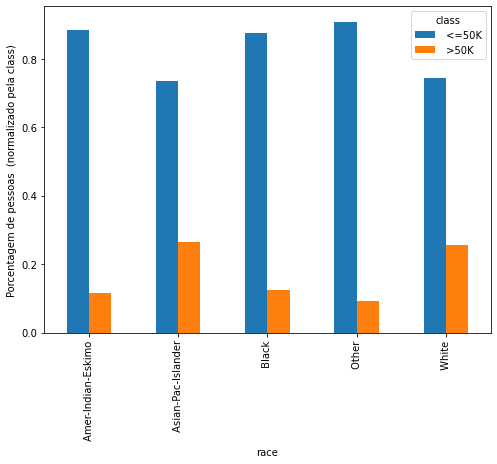

In [16]:
variavel='race'
analise_variavel_categorica(df_treino, variavel)

##plot distribution
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Percentagem de people')
ax.set_xlabel('Race')
ax.set_xticklabels(labels=[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'])
plt.show()

display(pd.crosstab([df_treino['race']], df_treino['class'], normalize='index'))

pd.crosstab([df_treino['race']], df_treino['class'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (normalizado pela class)')

### Variavel sex


* Variavel categorica com 2 classes distintas  
* Sem valores ausentes ou nulos 
* Valores dos dados desbalanceados, onde 66,9% (21790) das pessoas são do sexo masculino , enquanto 33.1%(10771)  das pessoas são do sexo feminino.
* Devido o elevado numero do sexo masculino comparado com o feminino, observamos que o sexo masculino possui maior ganho anual $50K por ano 

valores dos dados pela classe de variavel  sex:
 Male      21790
 Female    10771
Name: sex, dtype: int64

Percentagem dos dados pela classe de variavel sex:
 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

Valores unicos da variavel sex:
[' Male' ' Female']



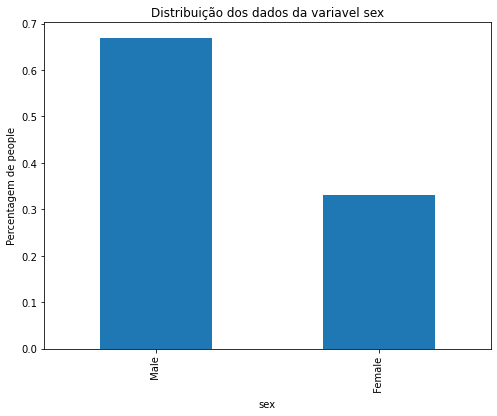

class,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


Text(0, 0.5, 'Porcentagem de pessoas  (normalizado pela class)')

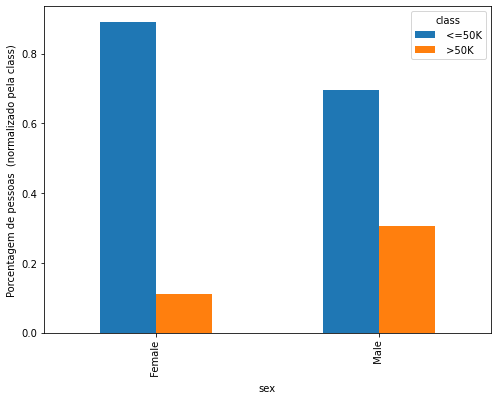

In [17]:
variavel='sex'
analise_variavel_categorica(df_treino, variavel)

##Plot de distribuição
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição dos dados da variavel '+variavel)
ax.set_ylabel('Percentagem de people')
ax.set_xlabel('sex')
ax.set_xticklabels(labels=[' Male', ' Female'])
plt.show()

display(pd.crosstab([df_treino['sex']], df_treino['class'], normalize='index'))

pd.crosstab([df_treino['sex']], df_treino['class'], normalize='index').plot.bar()
plt.ylabel('Porcentagem de pessoas  (normalizado pela class)')

### Variavel capital-gain

> Faz referencia ao aumento de capital 

__count:__ 32561\
__null:__ 0\
__mean:__ $1077.65\
__std:__ $7385.29\
__min:__ $0\
__25%:__ $0\
__50%:__ $0\
__75%:__ $0\
__max:__ $99999


* Variavel numerica com outliers
* Sem valores ausentes ou nulos 
* Em relação ao relacionamento entre o capital gain e a class, notamos que o boxplot de ambas classes em relação com a variavel target não apresenta diferenças notaveis.
* Ambos os boxplots aprensentam outliers para essa varaivel 

Distribuição de dados da variavel  capital-gain:
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

Porcentagem da distribuição dos dados da variavel  capital-gain:
0        0.916710
15024    0.010657
7688     0.008722
7298     0.007555
99999    0.004883
           ...   
1111     0.000031
2538     0.000031
22040    0.000031
4931     0.000031
5060     0.000031
Name: capital-gain, Length: 119, dtype: float64

Total de valores unicos da variavel capital-gain: 119



count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

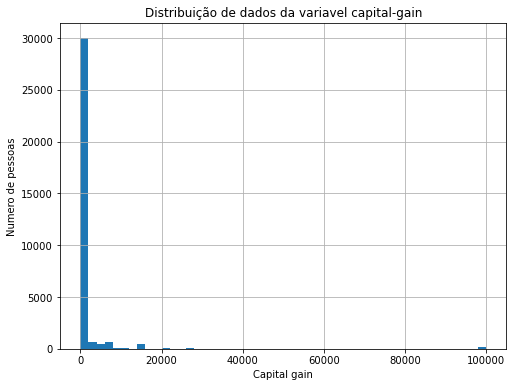

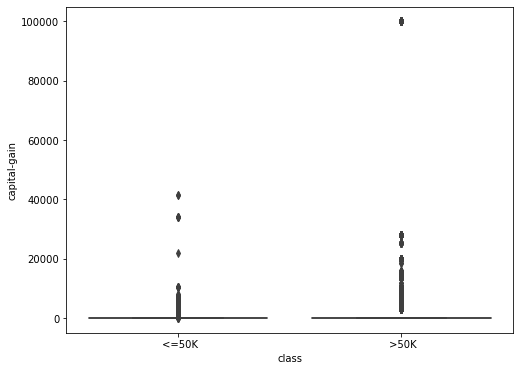

In [18]:
variavel='capital-gain'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Capital gain')
plt.show()

sns.boxplot(y='capital-gain', x='class', data=df_treino)
plt.show()

### Variável capital-loss
> Faz referência a perda de capital 

__count:__ 32561\
__null:__ 0\
__mean:__ $87.30\
__std:__ $402.96\
__min:__ $0\
__25%:__ $0\
__50%:__ $0\
__75%:__ $0\
__max:__ $4356


* Variável numerica com outliers
* Sem valores ausentes ou nulos 
* Avaliação semelhante a variável capital-gain 

Distribuição de dados da variavel  capital-loss:
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

Porcentagem da distribuição dos dados da variavel  capital-loss:
0       0.953349
1902    0.006204
1977    0.005160
1887    0.004883
1848    0.001566
          ...   
2080    0.000031
1539    0.000031
1844    0.000031
2489    0.000031
1411    0.000031
Name: capital-loss, Length: 92, dtype: float64

Total de valores unicos da variavel capital-loss: 92



count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

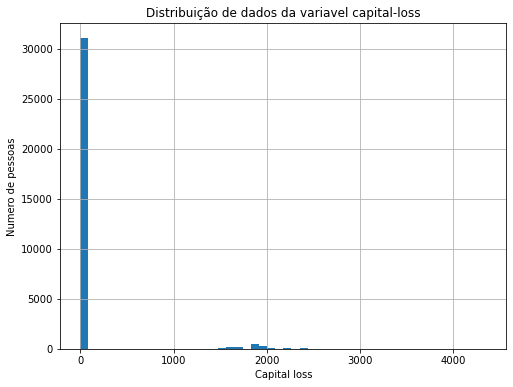

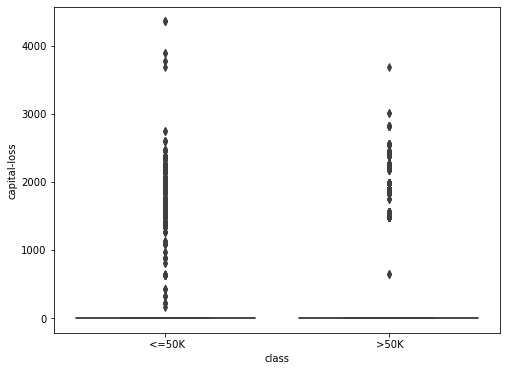

In [19]:
variavel='capital-loss'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('Capital loss')
plt.show()

sns.boxplot(y='capital-loss', x='class', data=df_treino)
plt.show()

### Variavel hours-per-week
> Horas de trabalho por semana 

__count:__ 32561\
__null:__ 0\
__mean:__ $40.44 horas\
__std:__ $12.35 horas\
__min:__ $1 horas\
__25%:__ $40 horas\
__50%:__ $40 horas\
__75%:__ $45 horas\
__max:__ $99 horas


* Variavel numerica com outliers
* Sem valores ausentes ou nulos 
* Distribuição desbalanceada , com grande concetração de pessoas que trabalham entre 40 e 45 horas por semana 
* Em relação ao relacionamento da variavel hours-per-week e class, notamos pessoas que trabalham mais horas por semana tendem a ganhar %50K
* Entretanto,existem casos de pessoas que possuem altos  valores de hours-per-week e tendem a ganhar menos ou igual a $50.

Distribuição de dados da variavel  hours-per-week:
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

Porcentagem da distribuição dos dados da variavel  hours-per-week:
40    0.467338
50    0.086576
45    0.056018
60    0.045300
35    0.039833
        ...   
82    0.000031
92    0.000031
87    0.000031
74    0.000031
94    0.000031
Name: hours-per-week, Length: 94, dtype: float64

Total de valores unicos da variavel hours-per-week: 94



count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

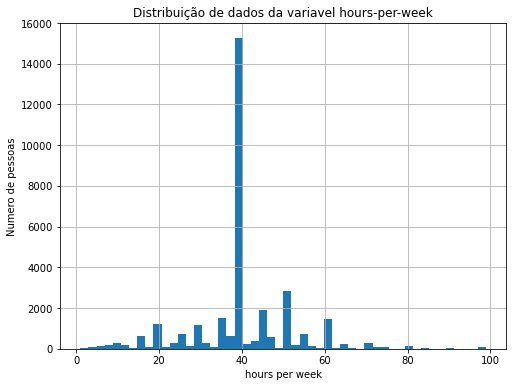

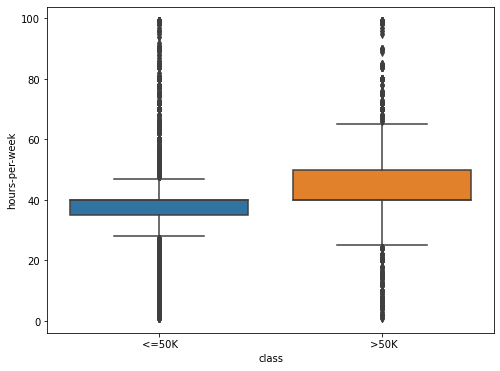

Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  >$50K/yr:  2.2665151561684227
Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  <=$50K/yr:  21.574890206074752
Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  >$50K/yr:  12.659316360062652
Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  <=$50K/yr:  41.57427597432511
Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  >$50K/yr:  9.155124228371363
Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  <=$50K/yr:  12.769878074997695


In [20]:
variavel='hours-per-week'
analise_variavel_continua(df_treino, variavel)

ax=df_treino[variavel].hist(bins=50)
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Numero de pessoas')
ax.set_xlabel('hours per week')
plt.show()

sns.boxplot(y='hours-per-week', x='class', data=df_treino)
plt.show()

print('Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  >$50K/yr: ', len(df_treino[(df_treino['hours-per-week']<40) & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Menos que 40 horas por semana e fazem  <=$50K/yr: ', len(df_treino[(df_treino['hours-per-week']<40) & (df_treino['class']==' <=50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  >$50K/yr: ', len(df_treino[((df_treino['hours-per-week'] >= 40) & (df_treino['hours-per-week'] <= 45)) & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Entre 40 and 45 horas por semana e fazem  <=$50K/yr: ', len(df_treino[((df_treino['hours-per-week'] >= 40) & (df_treino['hours-per-week'] <= 45)) & (df_treino['class']==' <=50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  >$50K/yr: ', len(df_treino[(df_treino['hours-per-week'] > 45) & (df_treino['class']==' >50K')])/len(df_treino)*100)
print('Porcentagem de pessoas que trabalham  Mais que 45 horas por semana e fazem  <=$50K/yr: ', len(df_treino[(df_treino['hours-per-week'] > 45) & (df_treino['class']==' <=50K')])/len(df_treino)*100)

### Variavel native-country

* Variavel categorica com 42 paises distintos
* Sem valores ausentes ou nulos. Entretanto, existe uma categoria "?", que deve indicar um tipo de pais desconhecido
* Distribuição muito desbalanceada , onde 89,6%(29170) das pessoas são dos United States
* Considerando a vasta quantidade de dados das pessoas que morando nos United States compado com outros paises, não é possivel observar claramento a tendencia dessas pessoas ganharem $50K

valores dos dados pela classe de variavel  native-country:
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua      

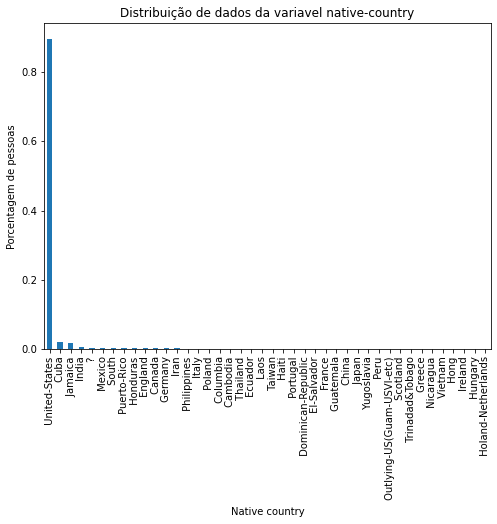

class,<=50K,>50K
native-country,,
?,0.749571,0.250429
Cambodia,0.631579,0.368421
Canada,0.677686,0.322314
China,0.733333,0.266667
Columbia,0.966102,0.033898
Cuba,0.736842,0.263158
Dominican-Republic,0.971429,0.028571
Ecuador,0.857143,0.142857
El-Salvador,0.915094,0.084906


In [21]:
variavel='native-country'
analise_variavel_categorica(df_treino, variavel)

##plot distribution
ax=df_treino[variavel].value_counts(normalize=True).plot.bar()
ax.set_title('Distribuição de dados da variavel '+variavel)
ax.set_ylabel('Porcentagem de pessoas')
ax.set_xlabel('Native country')
ax.set_xticklabels(labels=df_treino['native-country'].unique().tolist())
plt.show()

pd.crosstab([df_treino['native-country']], df_treino['class'], normalize='index') #normaliza em cada linha

# Relacionamento entre as variaveis 
relacionamento entre as variaveis sex, race, class e numericas
* na media, é possivel notar que independente do sexo e raça , pessoas mais velhas, com maior escolaridade , maiores ganhos de capital e que trabalham mais horas por semana tendem a ganhar mais de $50K quando comparado com os outros

In [22]:

display(df_treino.groupby(['sex', 'race', 'class']).mean())

age         fnlwgt  education-num  \
sex     race                class                                             
 Female  Amer-Indian-Eskimo  <=50K  36.906542  109018.626168       9.392523   
                             >50K   39.000000  148012.000000      12.416667   
         Asian-Pac-Islander  <=50K  34.227723  148165.333333      10.237624   
                             >50K   41.162791  142426.093023      11.465116   
         Black               <=50K  37.624573  213411.580205       9.416382   
                             >50K   41.588889  205806.033333      11.722222   
         Other               <=50K  31.388350  173235.932039       8.689320   
                             >50K   36.666667  160223.333333      12.500000   
         White               <=50K  36.073155  183485.120961       9.902942   
                             >50K   42.281128  184030.255837      11.794747   
 Male    Amer-Indian-Eskimo  <=50K  36.803571  126428.767857       8.851190   
                             >50K   40.041667  120721.541667      10.625000   
         Asian-Pac-Islander  <=50K  37.289130  163885.130435      10.573913   
                             >50K   42.596567  170698.347639      12.570815   
         Black               <=50K  36.124214  242343.990566       9.082547   
                             >50K   44.356902  245390.356902      10.882155   
         Other               <=50K  33.552448  214891.832168       8.468531   
                             >50K   42.947368  204551.736842      11.315789   
         White               <=50K  37.285136  189950.465418       9.467100   
                             >50K   44.739859  186917.770077      11.581376   

                                    capital-gain  capital-loss  hours-per-week  
sex     race                class                                               
 Female  Amer-Indian-Eskimo  <=50K    190.803738     16.084112       35.803738  
                             >50K    3699.333333      0.000000       43.500000  
         Asian-Pac-Islander  <=50K     83.000000     45.613861       37.138614  
                             >50K    5678.837209     87.767442       39.558140  
         Black               <=50K    106.800000     41.005461       36.491468  
                             >50K    7187.122222    117.811111       42.411111  
         Other               <=50K     45.582524     38.398058       35.514563  
                             >50K    3844.000000      0.000000       43.000000  
         White               <=50K    126.526005     49.218545       35.764513  
                             >50K    3884.992218    185.170233       40.238327  
 Male    Amer-Indian-Eskimo  <=50K    217.202381     23.107143       41.708333  
                             >50K    3881.666667    209.416667       45.625000  
         Asian-Pac-Islander  <=50K    134.954348     67.160870       39.273913  
                             >50K    5169.939914    225.429185       45.802575  
         Black               <=50K    121.119497     48.400943       38.834119  
                             >50K    3192.212121    189.902357       44.979798  
         Other               <=50K     91.328671     74.881119       41.363636  
                             >50K   11182.842105     99.315789       45.526316  
         White               <=50K    171.293619     57.495071       40.904241  
                             >50K    3941.794548    198.462145       46.460831

__Relacionamento entre as variaveis workclass, occupation, class e outras numericas
* Na media, é possivel notar o mesmo comportamento da analise feita anteriormente
* Em geral, pessoas mais velhas , que possuem um nivel de educação mais elevada, tem um grande ganho de capital e trabalham mais horas por semana tendem a ganhar $50K quando comparado com os outros 

In [23]:
display(df_treino.groupby(['occupation', 'class']).mean())

age         fnlwgt  education-num  \
occupation         class                                             
 ?                  <=50K  39.179177  189247.346852       9.016344   
                    >50K   55.617801  183567.052356      11.303665   
 Adm-clerical       <=50K  35.987128  192856.517315      10.016549   
                    >50K   43.254438  186810.232742      10.737673   
 Armed-Forces       <=50K  28.250000  199302.250000       9.625000   
                    >50K   46.000000  344415.000000      14.000000   
 Craft-repair       <=50K  37.659621  191657.759937       8.911041   
                    >50K   43.712594  193752.881593       9.792250   
 Exec-managerial    <=50K  39.609152  184837.102955      10.838894   
                    >50K   44.898374  183962.974085      12.099593   
 Farming-fishing    <=50K  40.445961  174844.003413       8.425484   
                    >50K   47.060870  134618.747826      10.008696   
 Handlers-cleaners  <=50K  31.462617  205426.799065       8.453271   
                    >50K   42.662791  188926.383721       9.360465   
 Machine-op-inspct  <=50K  37.048516  196050.591324       8.362443   
                    >50K   42.388000  187964.804000       9.364000   
 Other-service      <=50K  34.664661  188806.862571       8.717226   
                    >50K   41.518248  184034.875912      10.218978   
 Priv-house-serv    <=50K  41.689189  201804.986486       7.324324   
                    >50K   47.000000   97883.000000      13.000000   
 Prof-specialty     <=50K  37.942569  182426.587900      12.378343   
                    >50K   43.677246  188818.145239      13.551372   
 Protective-serv    <=50K  37.705479  202127.566210       9.842466   
                    >50K   41.545024  201858.085308      10.895735   
 Sales              <=50K  34.780277  190869.004124       9.904012   
                    >50K   44.336724  190931.711089      11.373347   
 Tech-support       <=50K  34.355039  190725.413953      10.871318   
                    >50K   43.102473  195227.321555      11.268551   
 Transport-moving   <=50K  39.120595  189970.879405       8.653093   
                    >50K   44.496875  191944.550000       9.221875   

                           capital-gain  capital-loss  hours-per-week  
occupation         class                                               
 ?                  <=50K    158.483051     47.758475       31.415860  
                    >50K    4462.109948    170.989529       36.146597  
 Adm-clerical       <=50K    136.621514     51.380938       37.032485  
                    >50K    2808.587771    121.378698       40.942801  
 Armed-Forces       <=50K      0.000000      0.000000       40.750000  
                    >50K       0.000000   1887.000000       40.000000  
 Craft-repair       <=50K    147.991483     66.569716       41.607256  
                    >50K    2360.839612    163.178687       44.682454  
 Exec-managerial    <=50K    184.039085     59.199237       42.810772  
                    >50K    4478.821646    223.738313       47.308435  
 Farming-fishing    <=50K    265.142207     43.268487       46.045506  
                    >50K    3070.678261    214.469565       54.208696  
 Handlers-cleaners  <=50K    110.855140     35.895639       37.626947  
                    >50K    2448.104651    191.058140       42.732558  
 Machine-op-inspct  <=50K    156.160388     48.395548       40.383562  
                    >50K    1537.772000    154.988000       43.364000  
 Other-service      <=50K     80.453452     34.113046       34.339455  
                    >50K    2746.474453    133.627737       43.051095  
 Priv-house-serv    <=50K    111.229730     21.594595       32.871622  
                    >50K   25236.000000      0.000000       35.000000  
 Prof-specialty     <=50K    191.931609     66.034196       40.110478  
                    >50K    5836.869285    222.158687       45.179666  
 Protective-serv    <=50K    245.623288     46.394977       41.5


### Engenharia de Atributos
#### Variaveis Categoricas
> Operações de melhoria
1. Transformação das variaveis com 2 classes para variavel binaria: class e sex
2. Variavel workclass: Criação de variavel workclass_simplifica combinando duas classes similares (Without-pay e Never-worked)
3. Variavel occupation : Criação de uma variavel occupation_simplificada combinando duas classes similares ('?' and Other-service)
4. Variavel marital_status : Criação de uma variavel marital_status_simplificada combinando duas classes similares (Married-civ-spouse and Married-AF-spouse) 
5. Variavel relationship : Criação de uma variavel relationship_simplificada combinando duas classes similares (Husband and Wife) 
6. Variavel race : Criação de uma variavel race_simplificada combinando todas as classes distintas de branco 
7. Variavel native-country : Criação de uma variavel native-country_simplificada criando 5 classes de continente.
8. Transformação das variaveis categoricas em numericas atraves da estrategia one-hot-encoding

In [24]:
##categorical features
df_treino=pd.get_dummies(df_treino, columns=['class', 'sex'], drop_first=True) #Transformação binaria

df_treino['workclass_simplificada']=df_treino['workclass'].apply(lambda variavel:' WO_pay' if variavel==' Without-pay' or variavel==' Never-worked' else variavel )

df_treino['occupation_simplificada']=df_treino['occupation'].apply( lambda variavel:' Other-service' if variavel==' Armed-Forces' or variavel=='?' or variavel=='Other-service' else variavel)

def status_married(variavel):
  #Combinação das classes similares
  if variavel==' Married-civ-spouse' or variavel==' Married-AF-spouse':       
    return ' Married'
  elif variavel==' Never-married':
    return variavel
  else:
    return ' No-spouse'

df_treino['marital-status_simplificada']=df_treino['marital-status'].map(status_married)



def grupos_race(variavel):
  #Agrupando algumas classes 
  if variavel==' White':       
    return variavel
  else:
    return ' Other'

df_treino['race_simplificada']=df_treino['race'].map(grupos_race)

def grupos_relacionamento(variavel):
  #Agrupando Classes similares
  if variavel==' Husband' or variavel==' Wife':       
    return ' Spouse'
  else:
    return variavel
df_treino['relationship_simplificada']=df_treino['relationship'].map(grupos_relacionamento)


def grupos_paises(val):
  #Agrupando paises em continentes
  if val==' United-States':       
    return val
  elif val in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' Columbia', ' Ecuador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Haiti', 
               ' Dominican-Republic', ' El-Salvador', ' Trinadad&Tobago', ' South']:
    return ' America'
  elif val in [' England', ' Canada', ' Germany', ' Italy', ' Poland',  ' Portugal', ' France', ' Greece',  ' Ireland', ' Hungary', ' Yugoslavia', ' Holand-Netherlands', 
               ' Scotland']:
    return ' Europe'
  elif val in [' India', ' Philippines', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong']:
    return ' Asia'
  else:
    return ' ?'

df_treino['native-country_simplificada']=df_treino['native-country'].map(grupos_paises)


df_treino=pd.get_dummies(df_treino, columns=['workclass_simplificada', 'occupation_simplificada', 'marital-status_simplificada', 'relationship_simplificada', 'race_simplificada', 'native-country_simplificada'], drop_first=True)


In [25]:
df_treino.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,class_ >50K,sex_ Male,workclass_simplificada_ Federal-gov,workclass_simplificada_ Local-gov,workclass_simplificada_ Private,workclass_simplificada_ Self-emp-inc,workclass_simplificada_ Self-emp-not-inc,workclass_simplificada_ State-gov,workclass_simplificada_ WO_pay,occupation_simplificada_ Adm-clerical,occupation_simplificada_ Craft-repair,occupation_simplificada_ Exec-managerial,occupation_simplificada_ Farming-fishing,occupation_simplificada_ Handlers-cleaners,occupation_simplificada_ Machine-op-inspct,occupation_simplificada_ Other-service,occupation_simplificada_ Priv-house-serv,occupation_simplificada_ Prof-specialty,occupation_simplificada_ Protective-serv,occupation_simplificada_ Sales,occupation_simplificada_ Tech-support,occupation_simplificada_ Transport-moving,marital-status_simplificada_ Never-married,marital-status_simplificada_ No-spouse,relationship_simplificada_ Other-relative,relationship_simplificada_ Own-child,relationship_simplificada_ Spouse,relationship_simplificada_ Unmarried,race_simplificada_ White,native-country_simplificada_ America,native-country_simplificada_ Asia,native-country_simplificada_ Europe,native-country_simplificada_ United-States
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


#### Variaveis Numericas
* Padronização das variaveis numericas age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week.

In [26]:
def padronizacao_variavel(df_x,variavel):
    ## Padronizando as variaveis
    std_sca=StandardScaler()
    std_sca.fit(df_x[variavel])
    df_x.loc[:,variavel]=std_sca.transform(df_x[variavel])
    return df_x

variavel=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_treino=padronizacao_variavel(df_treino,variavel)



In [27]:
df_treino.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,class_ >50K,sex_ Male,workclass_simplificada_ Federal-gov,workclass_simplificada_ Local-gov,workclass_simplificada_ Private,workclass_simplificada_ Self-emp-inc,workclass_simplificada_ Self-emp-not-inc,workclass_simplificada_ State-gov,workclass_simplificada_ WO_pay,occupation_simplificada_ Adm-clerical,occupation_simplificada_ Craft-repair,occupation_simplificada_ Exec-managerial,occupation_simplificada_ Farming-fishing,occupation_simplificada_ Handlers-cleaners,occupation_simplificada_ Machine-op-inspct,occupation_simplificada_ Other-service,occupation_simplificada_ Priv-house-serv,occupation_simplificada_ Prof-specialty,occupation_simplificada_ Protective-serv,occupation_simplificada_ Sales,occupation_simplificada_ Tech-support,occupation_simplificada_ Transport-moving,marital-status_simplificada_ Never-married,marital-status_simplificada_ No-spouse,relationship_simplificada_ Other-relative,relationship_simplificada_ Own-child,relationship_simplificada_ Spouse,relationship_simplificada_ Unmarried,race_simplificada_ White,native-country_simplificada_ America,native-country_simplificada_ Asia,native-country_simplificada_ Europe,native-country_simplificada_ United-States
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,0.148453,-0.21666,-0.035429,United-States,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,-0.145920,-0.21666,-2.222153,United-States,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,-0.145920,-0.21666,-0.035429,United-States,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,-0.145920,-0.21666,-0.035429,United-States,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,-0.145920,-0.21666,-0.035429,Cuba,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## Correlação entre as variaveis 
* Em geral, observamos que entre todas as variaveis do dataset não esta presente forte correlação entre elas 
* Contudo, considerando o cenario algumas variaveis apresentaram correlações moderadas (0,40 a 0,69) no sentido negativo. Enquanto uma aumenta, a outra diminui
* 'age', 'marital-status_simple_ Never-married': -0.54
* 'marital-status_simple_ Never-married', 'relationship_simple_ Spouse'): -0.64
* 'native-country_simple_ America', 'native-country_simple_ United-States': -0.65

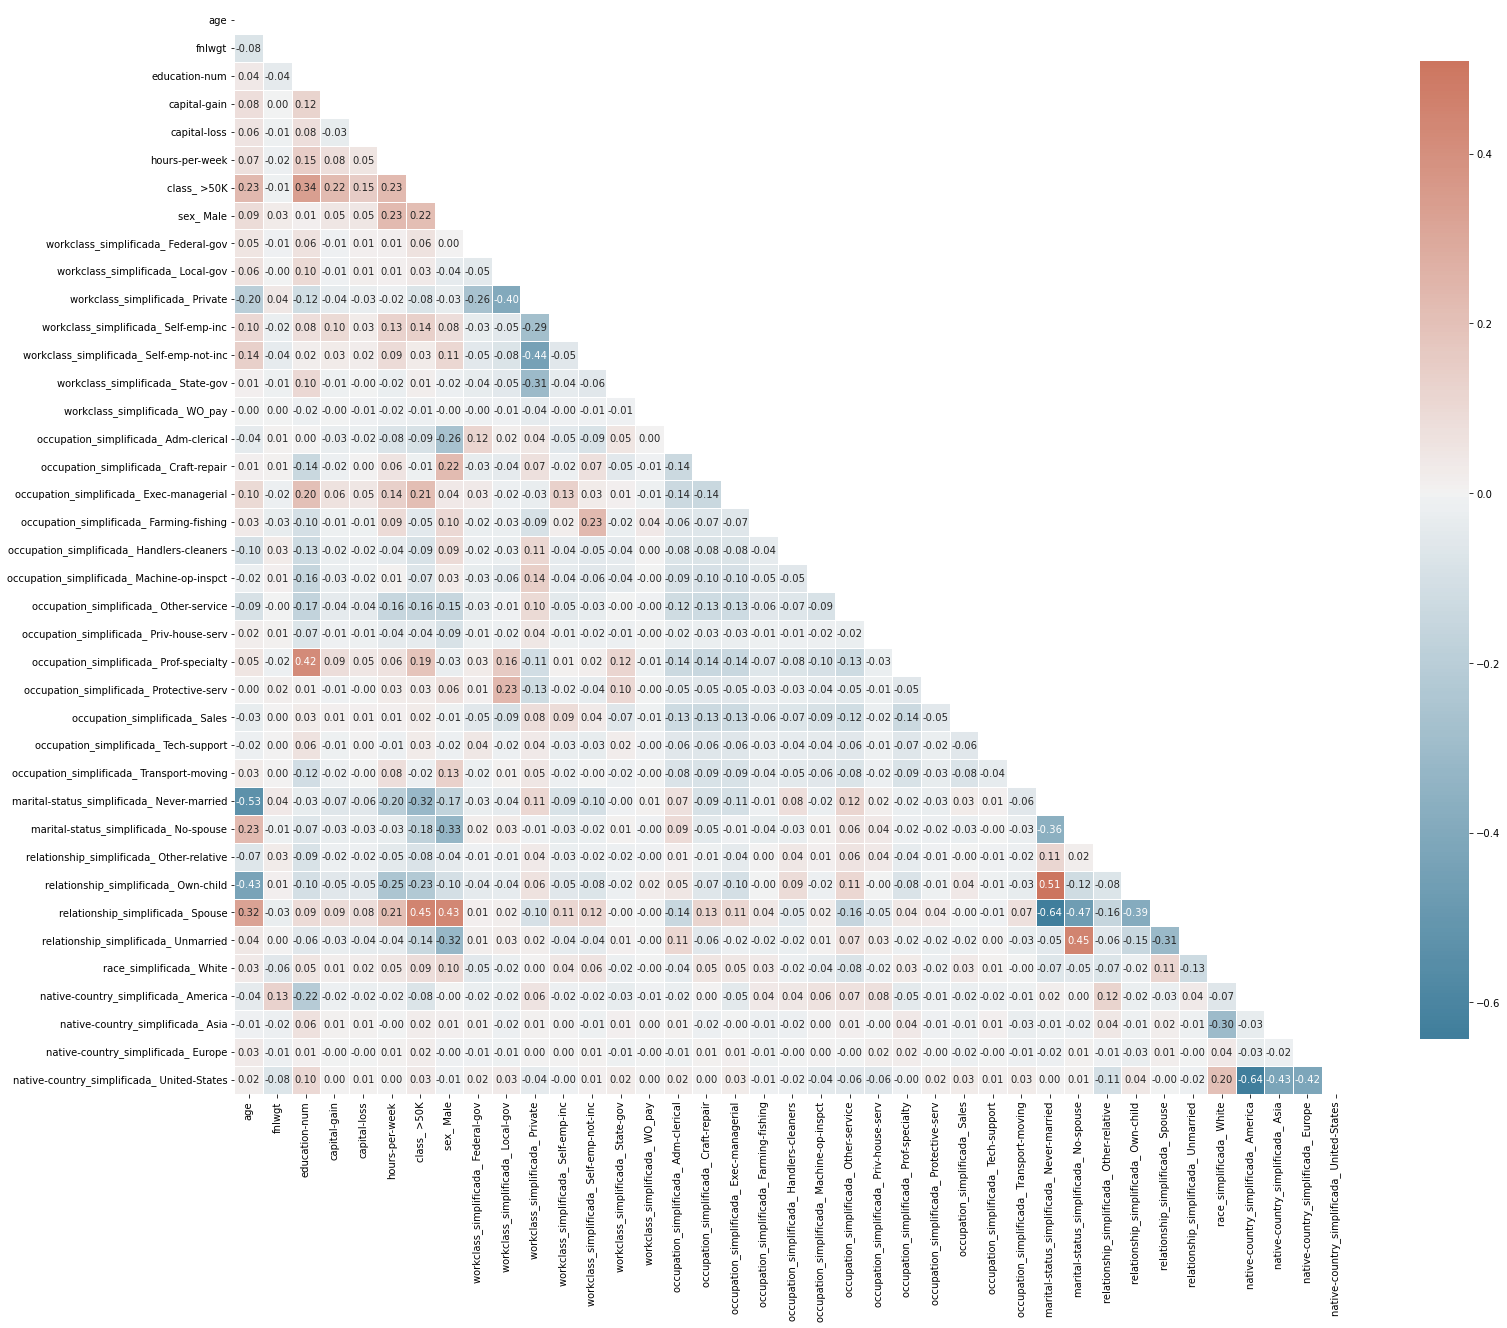

In [28]:

correlacao=df_treino.corr()
mask = np.triu(np.ones_like(correlacao, dtype=bool))
# Configurando a figura do matplotlib
f, ax = plt.subplots(figsize=(25, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plot = sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .9}, annot=True, fmt='.2f'  )

# Etapas de machine learning

__Variáveis para o modelo:__

X=variaveis de treino\
y=variaveis target

In [29]:
print(df_treino.columns)

variaveis=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week',
       'sex_ Male', 
       'workclass_simplificada_ Federal-gov',
       'workclass_simplificada_ Local-gov', 
       'workclass_simplificada_ Private',
       'workclass_simplificada_ Self-emp-inc', 
       'workclass_simplificada_ Self-emp-not-inc',
       'workclass_simplificada_ State-gov',
       'workclass_simplificada_ WO_pay',
       'occupation_simplificada_ Craft-repair', 
       'occupation_simplificada_ Exec-managerial',
       'occupation_simplificada_ Farming-fishing',
       'occupation_simplificada_ Handlers-cleaners',
       'occupation_simplificada_ Machine-op-inspct',
       'occupation_simplificada_ Other-service',
       'occupation_simplificada_ Priv-house-serv',
       'occupation_simplificada_ Prof-specialty',
       'occupation_simplificada_ Protective-serv', 
       'occupation_simplificada_ Sales',
       'occupation_simplificada_ Tech-support',
       'occupation_simplificada_ Transport-moving',
       'marital-status_simplificada_ Never-married',
       'marital-status_simplificada_ No-spouse',
       'relationship_simplificada_ Other-relative', 
       'relationship_simplificada_ Own-child',
       'relationship_simplificada_ Spouse', 
       'relationship_simplificada_ Unmarried',
       'race_simplificada_ White', 
       'native-country_simplificada_ America',
       'native-country_simplificada_ Asia', 
       'native-country_simplificada_ Europe',
       'native-country_simplificada_ United-States']

print(len(variaveis))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class_ >50K',
       'sex_ Male', 'workclass_simplificada_ Federal-gov',
       'workclass_simplificada_ Local-gov', 'workclass_simplificada_ Private',
       'workclass_simplificada_ Self-emp-inc',
       'workclass_simplificada_ Self-emp-not-inc',
       'workclass_simplificada_ State-gov', 'workclass_simplificada_ WO_pay',
       'occupation_simplificada_ Adm-clerical',
       'occupation_simplificada_ Craft-repair',
       'occupation_simplificada_ Exec-managerial',
       'occupation_simplificada_ Farming-fishing',
       'occupation_simplificada_ Handlers-cleaners',
       'occupation_simplificada_ Machine-op-inspct',
       'occupation_simplificada_ Other-service',
       'occupation_simplificada_ Priv-house-serv',
       'occupation_simplificada_ Prof-specialty',
       'occu

In [30]:
X = df_treino[variaveis]
y = df_treino['class_ >50K']


#### Balanceamento de classes e tratamento dos Outliers

Conforme observado na exploração de dados existem  variaveis que possuem desbalanceamento das classes.  Algumas transformações estatisticas poderão auxiliar na mitigação desses problemas.

Segundo(Mourão Nunes, 2018) São exemplos capazes de balancear classes\

* __Random Undersampling__ realiza uma amostragem aleatória simples nos dados pertencentes à categoria majoritária, para que a amostra fique com a mesma quantidade
de registros que a categoria minoritária;

* __Random Oversampling__ efetua uma amostragem simples com reposição da categoria
minoritária até que essa amostra atinja o mesmo número de registros que a categoria
majoritária; 

* __SMOTE__:gera registros da categoria minoritária por interpolação, até que haja o mesmo número de registros da categoria
majoritária

* __SMOTEEENN__   similar ao SMOTE, mas removendo outliers (valores extremos) pela técnica de edição de vizinhos mais próximos [13], onde são removidos da amostra elementos que não pertencem à maioria da categoria majoritária entre os k vizinhos;\

Aplicando o a tecnica __SMOTE__ sera  realizado a criação de dados sinteticos para balancear as classes , alem da criação de outliers sinteticos para realizar o treinamento do modelo de machine learning. 


In [31]:
#Biblioteca de balanceamento das classes
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X, y)

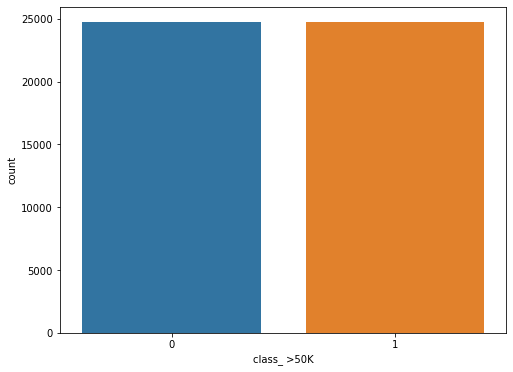

In [32]:
yi= y.astype(int)
np.bincount(yi)
#Visualização grafica dos dados balanceados
ax= sns.countplot(x=y)

In [33]:
#Divisão do dataset em treino e validação
treino_X, validacao_X, treino_y, validacao_y = train_test_split(X, y, test_size=0.25, stratify=y, random_state=376) 


In [34]:
#Função criada para auxiliar avaliação do desempenho dos modelos

def calc_performance_metrics(nome_modelo, validacao_y, preditora):
  ##metricas de classificação
  calc_acuracia=accuracy_score(validacao_y, preditora)
  calc_revocacao=recall_score(validacao_y, preditora)
  calc_precisao=precision_score(validacao_y, preditora)
  calc_f1=f1_score(validacao_y, preditora)

  print(nome_modelo+' Metrica de classificação:')
  print('Acuracia:', calc_acuracia)
  print('Revocacao:', calc_revocacao)
  print('Precisao:', calc_precisao)
  print('F1:', calc_f1)
  return calc_acuracia, calc_revocacao, calc_precisao, calc_f1

def calc_confusion_matrix(validacao_y, preditora):
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(validacao_y, preditora), display_labels=['<=$50K', '>$50K']).plot()
  tn, fp, fn, tp=confusion_matrix(validacao_y, preditora).ravel()
  print('\nTN: ', tn, 'FP: ', fp, 'FN: ', fn, 'TP: ', tp)


# Algoritmo de regressão logistica
Quantos dos nossos exemplos foram de fato classificados corretamente ?
* 0,82 de acuracia (predições corretas)\
PS: O resultado  pode ter um valor alto.Entretanto, o modelo pode ter uma performance inadequada.Por exemplo, considere o modelo que classifica fraudes de um banco entre positivo e negativo para os casos de fraudes, e em nosso conjunto temos 1000 exemplos , sendo 990 de clientes realizando transações de forma correta e 10 clientes realizando fraude. Caso o modelo simplifique todos os exemplos com negativo(sem fraude), ele ainda obteria uma acuraria de 99%

Dos exemplos classificados como positivos, quantos realmente são positivos? 
* 0,81 de precisao ( mede o numero de classes positivas previstas que pertencem a classe positiva (>$50K))


De todos os exemplos que são positivos, quantos foram classificados corretamente como positivo? 
* 0,85 de revocacao( medida do numero de classes positivas(>50K))




* 0,83 de F1 score( metrica utilizada para analise conjunta do precision e recall)

\[
\begin{aligned}
\mathrm{acuracia} &= \frac{ \mathrm{TP} + \mathrm{TN} }{ \mathrm{TP} + \mathrm{TN} + \mathrm{FP} + \mathrm{FN} }  = \frac{ 5268 + 4950 }{ 5268 + 4950 + 1230 + 912 } &= 0.827  
\\[10pt]
\mathrm{precisao} &= \frac{ \mathrm{TP} }{ \mathrm{TP} + \mathrm{FP} }  = \frac{ 5268 }{ 5268 + 1230 } &= 0.811  
\\[10pt]
\mathrm{revocacao} &= \frac{ \mathrm{TP} }{ \mathrm{TP} + \mathrm{FN} }  = \frac{ 5268 }{ 5268 + 912 } &= 0.852  
\\[10pt]
\mathrm{F1}_{score} &= 2 \cdot \frac{ \mathrm{precisao} \cdot \mathrm{revocacao} }{ \mathrm{precisao} + \mathrm{revocacao} }  = 2 \cdot \frac{ 0.811 \cdot 0.852 }{ 0.811 + 0.852 } &= 0.831  
\end{aligned}
\]

Regressão Logistica Metrica de classificação:
Acuracia: 0.8266990291262136
Revocacao: 0.8524271844660194
Precisao: 0.8107109879963066
F1: 0.8310459062943683

TN:  4950 FP:  1230 FN:  912 TP:  5268


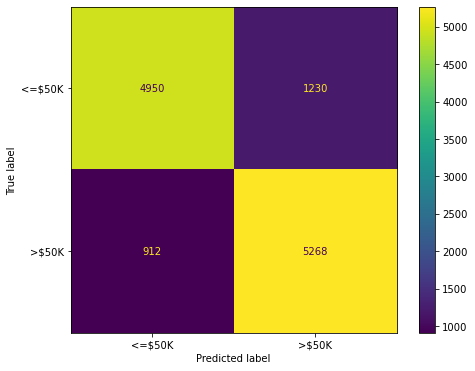

In [35]:
lr_model = LogisticRegression(max_iter=1000, random_state=376)
lr_model.fit(treino_X, treino_y) 
lr_prediction=lr_model.predict(validacao_X)
calc_performance_metrics('Regressão Logistica', validacao_y, lr_prediction)
calc_confusion_matrix(validacao_y, lr_prediction)

__TN__: verdadeiros negativos ou, particularmente, a quantidade de registros corretamente
classificados como falsos;\
__TP__: verdadeiros positivos, ou a quantidade de registros que foram classificados corretamente
como verdadeiros.\
__FN__: falsos negativos, ou número de registros erroneamente classificados como falsos;\
__FP__: falsos positivos, ou número de registros que foram classificados erroneamente
como verdadeiros;




In [36]:
import handcalcs.render
TN=4950; FP=1230; FN=912; TP=5268

In [37]:
%%render
Acuracia= (TP+TN)/(TP+TN+FP+FN)
precisao= TP/(TP+FP) 
revocacao= TP/(TP+FN)
F1_score= 2*(precisao*revocacao)/(precisao+revocacao)


<IPython.core.display.Latex object>

#### Realizando o tratamento dos dados de teste 

In [38]:
##Carregando os datasets de teste na fonte de dados 
teste_url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
df_teste=pd.read_csv(teste_url, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'], header=None, index_col=False)
df_teste=df_teste.drop([0], axis=0) #linha com formato errado 
df_teste=df_teste.reset_index(drop=True)
df_teste['age']=pd.to_numeric(df_teste['age']) #raelizando a conversão da variavel age para numerico
display(df_teste)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16277,64,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16278,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16279,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [39]:
#Variavel categorica
df_teste=pd.get_dummies(df_teste, columns=['class', 'sex'], drop_first=True) #Transformação binaria

df_teste['workclass_simplificada']=df_teste['workclass'].apply(lambda variavel:' WO_pay' if variavel==' Without-pay' or variavel==' Never-worked' else variavel )

df_teste['occupation_simplificada']=df_teste['occupation'].apply( lambda variavel:' Other-service' if variavel==' Armed-Forces' or variavel=='?' or variavel=='Other-service' else variavel)

def status_married(variavel):
#Combinação das classes similares
  if variavel==' Married-civ-spouse' or variavel==' Married-AF-spouse':       
    return ' Married'
  elif variavel==' Never-married':
    return variavel
  else:
    return ' No-spouse'

df_teste['marital-status_simplificada']=df_teste['marital-status'].map(status_married)




def grupos_race(variavel):
  #combinando as classes de alguns dados
  if variavel==' White':       
    return variavel
  else:
    return ' Other'

df_teste['race_simplificada']=df_teste['race'].map(grupos_race)



def grupos_relacionamento(variavel):
  #Combinação das classes similares
  if variavel==' Husband' or variavel==' Wife':       
    return ' Spouse'
  else:
    return variavel
df_teste['relationship_simplificada']=df_teste['relationship'].map(grupos_relacionamento)


def grupos_paises(val):
  #Combinando classes dos paises
  if val==' United-States':       
    return val
  elif val in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' Columbia', ' Ecuador', ' Guatemala', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Haiti', 
               ' Dominican-Republic', ' El-Salvador', ' Trinadad&Tobago', ' South']:
    return ' America'
  elif val in [' England', ' Canada', ' Germany', ' Italy', ' Poland',  ' Portugal', ' France', ' Greece',  ' Ireland', ' Hungary', ' Yugoslavia', ' Holand-Netherlands', 
               ' Scotland']:
    return ' Europe'
  elif val in [' India', ' Philippines', ' Iran', ' Cambodia', ' Thailand', ' Laos', ' Taiwan', ' China', ' Japan', ' Vietnam', ' Hong']:
    return ' Asia'
  else:
    return ' ?'

df_teste['native-country_simplificada']=df_teste['native-country'].map(grupos_paises)


df_teste=pd.get_dummies(df_teste, columns=['workclass_simplificada', 'occupation_simplificada', 'marital-status_simplificada', 'relationship_simplificada', 'race_simplificada', 'native-country_simplificada'], drop_first=True)




In [40]:
def padronizacao_variavel(df_x,variavel):
    ## Padronizando as variaveis
    std_sca=StandardScaler()
    std_sca.fit(df_x[variavel])
    df_x.loc[:,variavel]=std_sca.transform(df_x[variavel])
    return df_x

variavel=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

df_teste=padronizacao_variavel(df_teste,variavel)

In [41]:
df_teste.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,class_ >50K.,sex_ Male,workclass_simplificada_ Federal-gov,workclass_simplificada_ Local-gov,workclass_simplificada_ Private,workclass_simplificada_ Self-emp-inc,workclass_simplificada_ Self-emp-not-inc,workclass_simplificada_ State-gov,workclass_simplificada_ WO_pay,occupation_simplificada_ Adm-clerical,occupation_simplificada_ Craft-repair,occupation_simplificada_ Exec-managerial,occupation_simplificada_ Farming-fishing,occupation_simplificada_ Handlers-cleaners,occupation_simplificada_ Machine-op-inspct,occupation_simplificada_ Other-service,occupation_simplificada_ Priv-house-serv,occupation_simplificada_ Prof-specialty,occupation_simplificada_ Protective-serv,occupation_simplificada_ Sales,occupation_simplificada_ Tech-support,occupation_simplificada_ Transport-moving,marital-status_simplificada_ Never-married,marital-status_simplificada_ No-spouse,relationship_simplificada_ Other-relative,relationship_simplificada_ Own-child,relationship_simplificada_ Spouse,relationship_simplificada_ Unmarried,race_simplificada_ White,native-country_simplificada_ America,native-country_simplificada_ Asia,native-country_simplificada_ Europe,native-country_simplificada_ United-States
0,-0.994129,Private,0.353474,11th,-1.196864,Never-married,Machine-op-inspct,Own-child,Black,-0.142662,-0.218062,-0.031432,United-States,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
1,-0.055417,Private,-0.942391,HS-grad,-0.417886,Married-civ-spouse,Farming-fishing,Husband,White,-0.142662,-0.218062,0.769918,United-States,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,-0.777503,Local-gov,1.395450,Assoc-acdm,0.750582,Married-civ-spouse,Protective-serv,Husband,White,-0.142662,-0.218062,-0.031432,United-States,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
3,0.377835,Private,-0.275397,Some-college,-0.028397,Married-civ-spouse,Machine-op-inspct,Husband,Black,0.871091,-0.218062,-0.031432,United-States,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,-1.499590,?,-0.812954,Some-college,-0.028397,Never-married,?,Own-child,White,-0.142662,-0.218062,-0.832781,United-States,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1


In [42]:
X = df_teste[variaveis]
y = df_teste['class_ >50K.']


In [43]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(X, y)

In [44]:
#Divisão do dataset em treino e validação
treino_X, validacao_X, treino_y, validacao_y = train_test_split(X, y, test_size=0.25, stratify=y, random_state=376) 

Regressão Logistica Metrica de classificação:
Acuracia: 0.8279189449983918
Revocacao: 0.8607269218398199
Precisao: 0.8077271355267129
F1: 0.8333852382435378

TN:  2472 FP:  637 FN:  433 TP:  2676


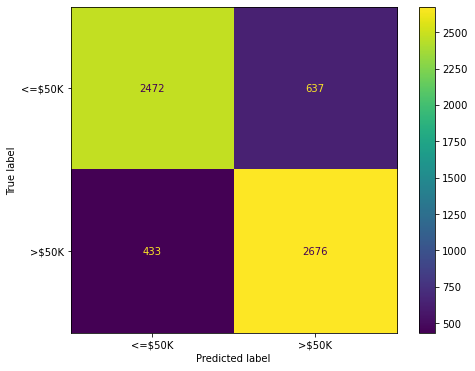

In [45]:
lr_model = LogisticRegression(max_iter=1000, random_state=376)
lr_model.fit(treino_X, treino_y) 
lr_prediction=lr_model.predict(validacao_X)
calc_performance_metrics('Regressão Logistica', validacao_y, lr_prediction)
calc_confusion_matrix(validacao_y, lr_prediction)